# Classification Predict Student Solution

© Explore Data Science Academy

## EA - Twitter Sentiment Classification 2023-2024
### Predict an individual’s belief in climate change based on their tweets!

---
### Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, This notebook will be creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.




### Honour Code

I **Olive Manamela**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## 1. Importing Packages
libraries that will be used throughout my classification analysis and modelling.


#### Install Comet

pip install comet_ml

In [216]:
'''from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model

experiment = Experiment(
  api_key="5zuuGMXCaoU5rFo4rVr4l12sE",
  project_name="Global Warming Sentiments",
  workspace="molive91"
)'''


'from comet_ml import Experiment\nfrom comet_ml.integration.sklearn import log_model\n\nexperiment = Experiment(\n  api_key="5zuuGMXCaoU5rFo4rVr4l12sE",\n  project_name="Global Warming Sentiments",\n  workspace="molive91"\n)'

In [217]:
# Libraries for data loading, data manipulation, and data visualization
import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Library for numerical computations
import seaborn as sns  # Data visualization library based on matplotlib
import matplotlib.pyplot as plt  # Data visualization library
%matplotlib inline
from matplotlib.colors import ListedColormap  # For creating a colormap from a list of colors
import re
import datetime

# Libraries for text processing
import re  # Regular expression operations
from nltk.tokenize import word_tokenize, TreebankWordTokenizer  # Tokenizers
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer  # Stemmers
from nltk.stem import WordNetLemmatizer  # Lemmatizer
from nltk.corpus import stopwords  # Stopwords

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer  # Convert a collection of text documents to a matrix of token counts
from sklearn.utils import resample  # Resample arrays or sparse matrices in a consistent way
from sklearn.pipeline import Pipeline  # Sequentially apply a list of transforms and a final estimator

# Libraries for model selection
from sklearn.model_selection import cross_val_score  # Evaluate a score by cross-validation
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  # Metrics module for model evaluation

# Libraries for preprocessing
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.datasets import make_moons, make_circles, make_classification  # Generate datasets

# Libraries for classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Machines classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Linear Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Quadratic Discriminant Analysis
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Ensemble classifiers
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for multinomial models

# Libraries for Class Balancing
from imblearn.over_sampling import RandomOverSampler


from sklearn.metrics import classification_report


## 2. Loading the training data

In [218]:
df = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [219]:
# look at data statistics
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


### Checking the distribution of the sentiments

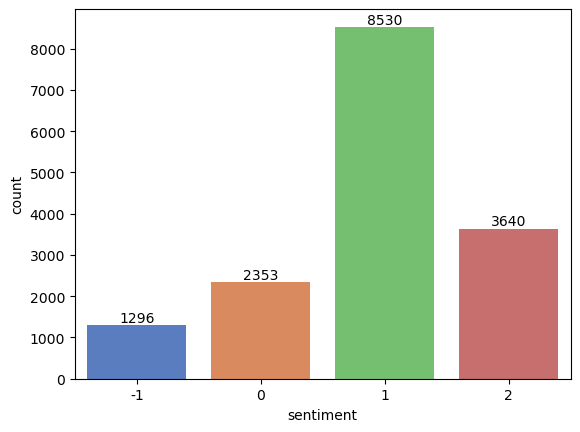

In [220]:
ax = sns.countplot(x='sentiment', data=df, palette='muted')  #Countplot shows the counts of observations in each categorical bin
ax.bar_label(ax.containers[0], label_type='edge') #This line is labeling the bars in the plot, using the first container of bars in the plot. Labels will be placed at the edge of each bar.
plt.show()

### Drop rows where 'message' has missing values

In [221]:
#Check for nulls
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [222]:
# Drop rows where 'message' has missing values
df = df.dropna(subset=['message'])  # Removes rows with NaN values in the 'message' column

## 3. Data Pre-Processing
in-depth analysis of all the variables in the DataFrame. 

### Clean the tweet by removing unwanted texts

In [223]:
def cleanTweet(text):
    
    text =  re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+' , '', text)       #Removing the hyperlinks
    text =  re.sub(r'#', '', text)             # Removing the # for hashtags
    text =  re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @Mentions
    text =  re.sub(r'RT[\s]+', '', text)       # Removing RT symbol for Retweet
    text =  re.sub(r'rt[\s]+', '', text)       # Removing RT symbol for Retweet      
    text =  re.sub(r':', '', text)             # Removing : symbol      
    text =  re.sub(r'@\w+\s?', '', text)       # Remove @mentions
    text =  re.sub(r'_', '', text)             # Remove underscores
    text =  re.sub(r'\n', '', text)            # Remove \n for new line
    return text


In [224]:
'''#Apply the function to the message column to clean the tweet
df['message'] =  df['message'].apply(cleanTweet)

#show the cleaned tweet
df['message'] '''

"#Apply the function to the message column to clean the tweet\ndf['message'] =  df['message'].apply(cleanTweet)\n\n#show the cleaned tweet\ndf['message'] "

### Visualize the words using cloud 

!pip install wordcloud

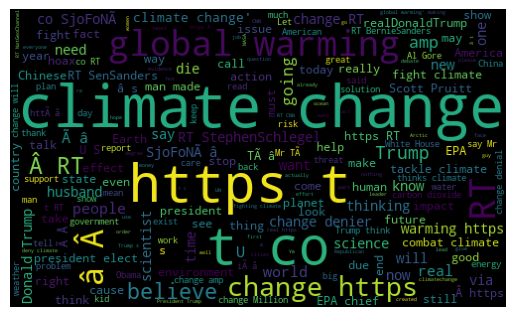

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join( [t for t in df['message']])
wordCloud = WordCloud(width = 500, height = 300, random_state =30, max_font_size = 100).generate(words)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### Class Balancing / Model improvement
Using RandomOverSampler library
This is for us to align the problem of the sentiment distribution by upsmpling and downsampling.

In [226]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=50)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['sentiment'], test_size=0.10, random_state=50)
X_resampled, y_resampled = ros.fit_resample(pd.DataFrame(X_train), y_train)
print('Done')

Done


In [227]:
y_train

5675     2
11283    1
13493    1
11398    2
13892    1
        ..
15649    2
6253     2
10123    0
5600     1
14000    1
Name: sentiment, Length: 13446, dtype: int64

ax = sns.countplot(x='sentiment', data=y_train, palette='muted')  #Countplot shows the counts of observations in each category after the RandomOverSampler
ax.bar_label(ax.containers[0], label_type='edge') #This line is labeling the bars in the plot, using the first container of bars in the plot. Labels will be placed at the edge of each bar.
plt.show()

!pip install imbalanced-learn

### Use pipeline that vectorizes the text data and then applies the classifier

In [228]:

# Create a pipeline that vectorizes the text data and then applies the classifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    #This below line is initializing a logistic regression model. The multi_class='ovr' argument means that in case of a multi-class classification problem, a binary problem is fit for each label (One-vs-Rest scheme).
    ('clf2', LogisticRegression(multi_class='ovr'))  ])

# Define the parameter grid for grid search
param_grid = {
    'clf2__C': [0.1, 5, 15, 80, 120, 180, 250],
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]  # Add ngram_range to the grid
}

# Initialize GridSearchCV
text_clf = GridSearchCV(text_clf, param_grid=param_grid, cv=10, n_jobs=-1)

# Train the classifier
text_clf.fit(X_resampled['message'], y_resampled)

print(param_grid)

# Test the classifier
predicted = text_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, predicted))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'clf2__C': [180, 250], 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]}
              precision    recall  f1-score   support

          -1       0.67      0.45      0.54       182
           0       0.66      0.55      0.60       360
           1       0.80      0.85      0.83      1317
           2       0.74      0.80      0.77       514

    accuracy                           0.76      2373
   macro avg       0.72      0.66      0.68      2373
weighted avg       0.76      0.76      0.76      2373



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Print the best grid search parameters and their score

In [229]:
# Print the best parameters and their score
print("Best parameters: ", text_clf.best_params_)
print("Best cross-validation score: ", text_clf.best_score_)

Best parameters:  {'clf2__C': 250, 'vect__ngram_range': (1, 2)}
Best cross-validation score:  0.950472309397786


### Print the classification report

In [230]:
# Print the classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.67      0.45      0.54       182
           0       0.66      0.55      0.60       360
           1       0.80      0.85      0.83      1317
           2       0.74      0.80      0.77       514

    accuracy                           0.76      2373
   macro avg       0.72      0.66      0.68      2373
weighted avg       0.76      0.76      0.76      2373



## 4. Pre Processing for Test dataset

### Read the test dataset

In [231]:
##Apply same Pre-processing to the test data
df_test = pd.read_csv('test_with_no_labels.csv')

### Drop rows where 'message' has missing values

In [232]:
# Drop rows where 'message' has missing values
df_test = df_test.dropna(subset=['message'])  # Removes rows with NaN values in the 'message' column

### Clean the tweet dataset

In [233]:
'''#Apply the cleanTweet function to the message column in the test to clean the tweet
df_test['message'] =  df_test['message'].apply(cleanTweet)

#show the cleaned tweet
df_test['message'] '''

"#Apply the cleanTweet function to the message column in the test to clean the tweet\ndf_test['message'] =  df_test['message'].apply(cleanTweet)\n\n#show the cleaned tweet\ndf_test['message'] "

### Fitting the data to the Count Vectorizer 

In [234]:
#fitting the data to the Count Vectorizer 
vect_test = CountVectorizer()
X_testt = vect_test.fit_transform(df_test['message'])


In [235]:
X_testt.shape

(10546, 24149)

In [236]:
df_test['message']

0        Europe will now be looking to China to make su...
1        Combine this with the polling of staffers re c...
2        The scary, unimpeachable evidence that climate...
3        @Karoli @morgfair @OsborneInk @dailykos \nPuti...
4        RT @FakeWillMoore: 'Female orgasms cause globa...
                               ...                        
10541    RT @BrittanyBohrer: Brb, writing a poem about ...
10542    2016: the year climate change came home: Durin...
10543    RT @loop_vanuatu: Pacific countries positive a...
10544    RT @xanria_00018: You’re so hot, you must be t...
10545    RT @chloebalaoing: climate change is a global ...
Name: message, Length: 10546, dtype: object

### Use the Logistict model to make predictions on the test set

In [237]:
# Use the model to make predictions on the test set
predictions = text_clf.predict(df_test['message'])

In [238]:
# Create a new DataFrame with the original data and the predictions
submission_df = pd.DataFrame({
    'tweetid': df_test['tweetid'],
    'sentiment': predictions
})

# Get the current date and time
now = datetime.datetime.now()

# Format as a string
timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")

# timestamp to use in the filename
submission_df.to_csv(f'submission_{timestamp}.csv', index=False)

# Print a success message
print("The predictions on the test set were successfully saved to" ,f'submission_{timestamp}.csv')

The predictions on the test set were successfully saved to submission_2024-04-21_23-32-04.csv


In [239]:
'''#### Log all data through the Experiment class

experiment.log_parameters(params)
experiment.log_metrics(metrics)

log_model(experiment, model=text_clf, model_name="text_clf")'''

'#### Log all your data through the Experiment class\n\nexperiment.log_parameters(params)\nexperiment.log_metrics(metrics)\n\nlog_model(experiment, model=text_clf, model_name="text_clf")'

In [240]:
'''import requests

#Trello API credentials
API_KEY = "5zuuGMXCaoU5rFo4rVr4l12sE"
#API_TOKEN = 'API_TOKEN'

BOARD_ID = 'GlobalWarmingSentiments'
LIST_NAME = 'To Do'

# Templates for tasks, including their titles and due dates
TASK_TEMPLATES = [
    {'Preparatory': 'Loading libraries', 'due_date': '2024-04-08'},
    {'Preparatory': 'Pre-processing', 'due_date': '2024-04-12'},
    {'Preparatory': 'Class re-balancing', 'due_date': '2024-04-15'},
    {'Model_Building': 'Model_Building and Training', 'due_date': '2024-04-18'},
    {'Test_Data': 'Predict on test data', 'due_date': '2024-04-18'}
]

# Create tasks on Trello board
for task in TASK_TEMPLATES:
    payload = {
        'key': API_KEY,
        'token': API_TOKEN,
        'idList': LIST_NAME,
        'name': task['title'],
        'due': task['due_date']
    }
    response = requests.post(f"https://api.trello.com/1/cards/{GlobalWarmingSentiments}", data=payload)

    if response.status_code == 200:
        print(f"Task '{task['title']}' created successfully.")
    else:
        print(f"Failed to create task '{task['title']}'.")'''


'import requests\n\n#Trello API credentials\nAPI_KEY = "5zuuGMXCaoU5rFo4rVr4l12sE"\n#API_TOKEN = \'YOUR_API_TOKEN\'\n\nBOARD_ID = \'GlobalWarmingSentiments\'\nLIST_NAME = \'To Do\'\n\n# Templates for tasks, including their titles and due dates\nTASK_TEMPLATES = [\n    {\'Preparatory\': \'Loading libraries\', \'due_date\': \'2024-04-08\'},\n    {\'Preparatory\': \'Pre-processing\', \'due_date\': \'2024-04-12\'},\n    {\'Preparatory\': \'Class re-balancing\', \'due_date\': \'2024-04-15\'},\n    {\'Model_Building\': \'Model_Building and Training\', \'due_date\': \'2024-04-18\'},\n    {\'Test_Data\': \'Predict on test data\', \'due_date\': \'2024-04-18\'}\n]\n\n# Create tasks on Trello board\nfor task in TASK_TEMPLATES:\n    payload = {\n        \'key\': API_KEY,\n        \'token\': API_TOKEN,\n        \'idList\': LIST_NAME,\n        \'name\': task[\'title\'],\n        \'due\': task[\'due_date\']\n    }\n    response = requests.post(f"https://api.trello.com/1/cards/{GlobalWarmingSentiments

# Conclusion

## 5.Output analysis / Classification methodology

The problem at hand was a multi-class text classification task, where the goal was to predict the sentiment of a given message. The data was imbalanced, meaning that some sentiment classes had many more examples than others. To address this, we used the RandomOverSampler from the imblearn library to oversample the minority classes in the training data, making the class distribution more balanced and improving the model’s ability to learn from under-represented classes.

The text was then vectorized using CountVectorizer, which converts the text data into a matrix of token counts. This is a simple and effective way of representing text data numerically.

I have also used the GridSearchCv to help me find the best fitting parameters for my model

For the classification task, we used LogisticRegression with the multi_class='ovr' option. Logistic Regression is a simple yet powerful linear model that works well for many text classification tasks. The multi_class='ovr' option stands for “One-vs-Rest”. In this strategy, a binary problem is fit for each label, and the decision function predicts the class with the highest confidence score. This approach is suitable for our task because it allows the model to focus on distinguishing each class from all others, which can be beneficial when dealing with imbalanced data or when some classes are harder to distinguish than others.

In conclusion, the combination of oversampling, text preprocessing, and One-vs-Rest Logistic Regression allowed us to build a robust text classification model that can handle imbalanced data and predict multiple sentiment classes. This approach is flexible and can be adapted to other similar tasks with minimal changes. It’s a testament to the power and versatility of machine learning techniques in tackling complex real-world problems.

#### Github upload
https://github.com/molive91/ClassificationModels'''